# Importing libraries and data

In [1]:
!pip install kmodes

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from kmodes.kprototypes import KPrototypes

In [3]:
from sklearn.datasets import make_blobs

In [4]:
import itertools
import matplotlib as mpl
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)

In [5]:
banking_clean = pd.read_csv(r'C:\Users\alden\Desktop\data science labs\data for final project\banking_clean1.csv', index_col=0)

In [6]:
banking_clean.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,previous,y,previously_contacted
0,58,management,married,2,no,2143,yes,no,5,may,261,1,0,0,0
1,44,technician,single,1,no,29,yes,no,5,may,151,1,0,0,0
2,33,entrepreneur,married,1,no,2,yes,yes,5,may,76,1,0,0,0
5,35,management,married,2,no,231,yes,no,5,may,139,1,0,0,0
6,28,management,single,2,no,447,yes,yes,5,may,217,1,0,0,0


## Modeling

In [7]:
#defining target variables and predictors 
y = banking_clean['y']
X = banking_clean.drop('y', axis=1)

In [8]:
#creating a test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
banking_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   43193 non-null  int64 
 1   job                   43193 non-null  object
 2   marital               43193 non-null  object
 3   education             43193 non-null  int64 
 4   default               43193 non-null  object
 5   balance               43193 non-null  int64 
 6   housing               43193 non-null  object
 7   loan                  43193 non-null  object
 8   day                   43193 non-null  int64 
 9   month                 43193 non-null  object
 10  duration              43193 non-null  int64 
 11  campaign              43193 non-null  int64 
 12  previous              43193 non-null  int64 
 13  y                     43193 non-null  int64 
 14  previously_contacted  43193 non-null  int64 
dtypes: int64(9), object(6)
memory usage:

In [10]:
#defining object columns

object_columns = [1,2,4,6,7,9]

In [11]:
#creating numpy array to feed into model

banking_array = banking_clean.values

In [12]:
#defining float data types of columns 

banking_array[:,0] = banking_array[:,0].astype(float)
banking_array[:,3] = banking_array[:,3].astype(float)
banking_array[:,5] = banking_array[:,5].astype(float)
banking_array[:,8] = banking_array[:,8].astype(float)
banking_array[:,10] = banking_array[:,10].astype(float)
banking_array[:,11] = banking_array[:,11].astype(float)
banking_array[:,12] = banking_array[:,12].astype(float)
banking_array[:,13] = banking_array[:,13].astype(float)
banking_array[:,14] = banking_array[:,14].astype(float)

In [13]:
#checking array 

banking_array

array([[58.0, 'management', 'married', ..., 0.0, 0.0, 0.0],
       [44.0, 'technician', 'single', ..., 0.0, 0.0, 0.0],
       [33.0, 'entrepreneur', 'married', ..., 0.0, 0.0, 0.0],
       ...,
       [72.0, 'retired', 'married', ..., 3.0, 1.0, 1.0],
       [57.0, 'blue-collar', 'married', ..., 0.0, 0.0, 0.0],
       [37.0, 'entrepreneur', 'married', ..., 11.0, 0.0, 1.0]],
      dtype=object)

In [14]:
#WCSS values obtained from running code below 

wcss_just_in_case_jupyter_dies = [402622824853.7919,
 191904929650.28986,
 107201621983.94794,
 72082020151.21986,
 46568176317.05858,
 34036172510.301434,
 27260774393.654785,
 22059858650.22813]

In [15]:
#getting values to create a WCSS VS Cluster plot to perform elbow method to find number of clusters 

#code works just takes very long to run 


# %%time
# # Create an empty list to store WCSS values for each number of clusters
# wcss = []

# # Fit K-prototypes for k=1 to k=10
# for i in range(1, 9):
#     kpro_elbow = KPrototypes(n_clusters=i, init='Cao')
#     kpro_elbow.fit_predict(banking_array, categorical=object_columns)
#     wcss.append(kpro_elbow.cost_)

# # # Plot WCSS values against number of clusters
# # plt.plot(range(1, 11), wcss)
# # plt.title('Elbow Method')
# # plt.xlabel('Number of clusters')
# # plt.ylabel('WCSS')
# # plt.show()

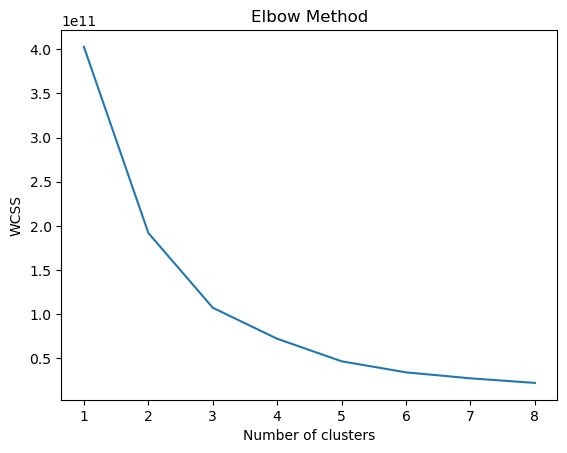

In [16]:
#plotting WCSS vs number of clusters to find best number of clusters 

plt.plot(range(1, 9), wcss_just_in_case_jupyter_dies)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## clustering with 2 

In [17]:
%%time
#defining model and using fit_predict to fit model and predict clusters 

kpro2 = KPrototypes(n_clusters=2, verbose =2, max_iter= 100)
clusters_kpro2 = kpro2.fit_predict(banking_array, categorical=object_columns)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 15718, ncost: 240720550743.98016
Run: 1, iteration: 2/100, moves: 4666, ncost: 208644450499.81564
Run: 1, iteration: 3/100, moves: 1645, ncost: 197927775239.55444
Run: 1, iteration: 4/100, moves: 752, ncost: 194107519501.51926
Run: 1, iteration: 5/100, moves: 368, ncost: 192706959669.1175
Run: 1, iteration: 6/100, moves: 211, ncost: 192154900285.83694
Run: 1, iteration: 7/100, moves: 116, ncost: 191974859310.03537
Run: 1, iteration: 8/100, moves: 56, ncost: 191922035122.9954
Run: 1, iteration: 9/100, moves: 25, ncost: 191913134968.75922
Run: 1, iteration: 10/100, moves: 16, ncost: 191908722254.59094
Run: 1, iteration: 11/100, moves: 15, ncost: 191905741622.6126
Run: 1, iteration: 12/100, moves: 7, ncost: 191904942714.36383
Run: 1, iteration: 13/100, moves: 1, ncost: 191904924500.91156
Run: 1, iterati

Run: 9, iteration: 10/100, moves: 20, ncost: 191910780071.9636
Run: 9, iteration: 11/100, moves: 12, ncost: 191907924256.71457
Run: 9, iteration: 12/100, moves: 12, ncost: 191905651190.19815
Run: 9, iteration: 13/100, moves: 6, ncost: 191904942714.36383
Run: 9, iteration: 14/100, moves: 1, ncost: 191904924500.91156
Run: 9, iteration: 15/100, moves: 0, ncost: 191904924500.91156
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/100, moves: 4015, ncost: 210048332025.51285
Run: 10, iteration: 2/100, moves: 1725, ncost: 198646406273.5245
Run: 10, iteration: 3/100, moves: 805, ncost: 194468935501.4851
Run: 10, iteration: 4/100, moves: 398, ncost: 192859426454.71066
Run: 10, iteration: 5/100, moves: 239, ncost: 192191785532.1149
Run: 10, iteration: 6/100, moves: 119, ncost: 191994356314.38815
Run: 10, iteration: 7/100, moves: 63, ncost: 191927645726.30847
Run: 10, iteration: 8/100, moves: 29, ncost: 191914817581.01117
Run: 10, iteration: 9/1

In [18]:
#adding clusters to dictionary 

cluster_dict1=[]
for c in clusters_kpro2:
    cluster_dict1.append(c)

In [19]:
#adding cluster dictionary to dataframe

banking_clean['clusters_2_cent'] = cluster_dict1

In [20]:
#checking dataframe

banking_clean

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,previous,y,previously_contacted,clusters_2_cent
0,58,management,married,2,no,2143,yes,no,5,may,261,1,0,0,0,1
1,44,technician,single,1,no,29,yes,no,5,may,151,1,0,0,0,1
2,33,entrepreneur,married,1,no,2,yes,yes,5,may,76,1,0,0,0,1
5,35,management,married,2,no,231,yes,no,5,may,139,1,0,0,0,1
6,28,management,single,2,no,447,yes,yes,5,may,217,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,2,no,825,no,no,17,nov,977,3,0,1,0,1
45207,71,retired,divorced,0,no,1729,no,no,17,nov,456,2,0,1,0,1
45208,72,retired,married,1,no,5715,no,no,17,nov,1127,5,3,1,1,1
45209,57,blue-collar,married,1,no,668,no,no,17,nov,508,4,0,0,0,1


In [21]:
#defining clusters 

cluster2_1 = banking_clean[banking_clean['clusters_2_cent']==0]
cluster2_2 = banking_clean[banking_clean['clusters_2_cent']==1]


In [22]:
#checking statistical summary of cluster 2 

cluster2_1.describe()

,age,education,balance,day,duration,campaign,previous,y,previously_contacted,clusters_2_cent
count,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.0
mean,43.607545,1.318694,12020.263514,16.079392,275.385698,2.626126,0.687500,0.155968,0.210023,0.0
std,11.490926,0.702358,8174.047625,7.806671,286.867160,2.838542,2.334742,0.362928,0.407439,0.0
min,20.000000,0.000000,6463.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0
25%,34.000000,1.000000,7620.000000,10.000000,107.000000,1.000000,0.000000,0.000000,0.000000,0.0
50%,42.000000,1.000000,9308.500000,18.000000,187.000000,2.000000,0.000000,0.000000,0.000000,0.0
75%,52.000000,2.000000,13090.250000,21.000000,336.000000,3.000000,0.000000,0.000000,0.000000,0.0
max,87.000000,2.000000,102127.000000,31.000000,4918.000000,31.000000,35.000000,1.000000,1.000000,0.0


In [23]:
#checking statistical summary of cluster 2

cluster2_2.describe()

,age,education,balance,day,duration,campaign,previous,y,previously_contacted,clusters_2_cent
count,41417.000000,41417.000000,41417.000000,41417.000000,41417.000000,41417.000000,41417.000000,41417.000000,41417.000000,41417.0
mean,40.642152,1.142357,896.649081,15.797837,257.591762,2.763841,0.580462,0.114542,0.182027,1.0
std,10.451514,0.662298,1303.790821,8.326604,256.837876,3.073189,2.332511,0.318473,0.385871,0.0
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
25%,32.000000,1.000000,59.000000,8.000000,103.000000,1.000000,0.000000,0.000000,0.000000,1.0
50%,39.000000,1.000000,400.000000,16.000000,180.000000,2.000000,0.000000,0.000000,0.000000,1.0
75%,48.000000,2.000000,1227.000000,21.000000,318.000000,3.000000,0.000000,0.000000,0.000000,1.0
max,95.000000,2.000000,6450.000000,31.000000,3881.000000,58.000000,275.000000,1.000000,1.000000,1.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


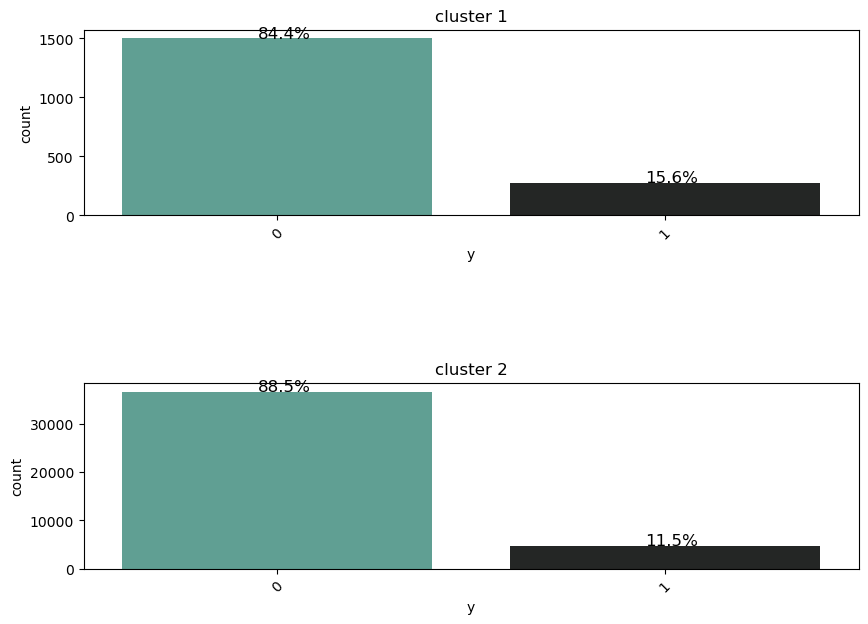

In [24]:
#Checking target variable breakdown for clusters

fig = plt.figure(figsize = (10,7))

ax1 = fig.add_subplot(2, 1, 1)
ax1 = sns.countplot('y', data=cluster2_1, palette='dark:#5A9_r')
ax1_total = cluster2_1.shape[0]
plt.title('cluster 1')
plt.xticks(rotation=45)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/ax1_total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax1.annotate(percentage, (x, y), size = 12)

ax2 = fig.add_subplot(2, 1, 2)
ax2 = sns.countplot('y', data=cluster2_2, palette = 'dark:#5A9_r')
ax2_total = cluster2_2.shape[0]
plt.title('cluster 2')
plt.xticks(rotation=45)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/ax2_total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y), size = 12)


plt.subplots_adjust(hspace=0.9)

Cluster 1 is more likely to make a term deposit compared to cluster 2 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


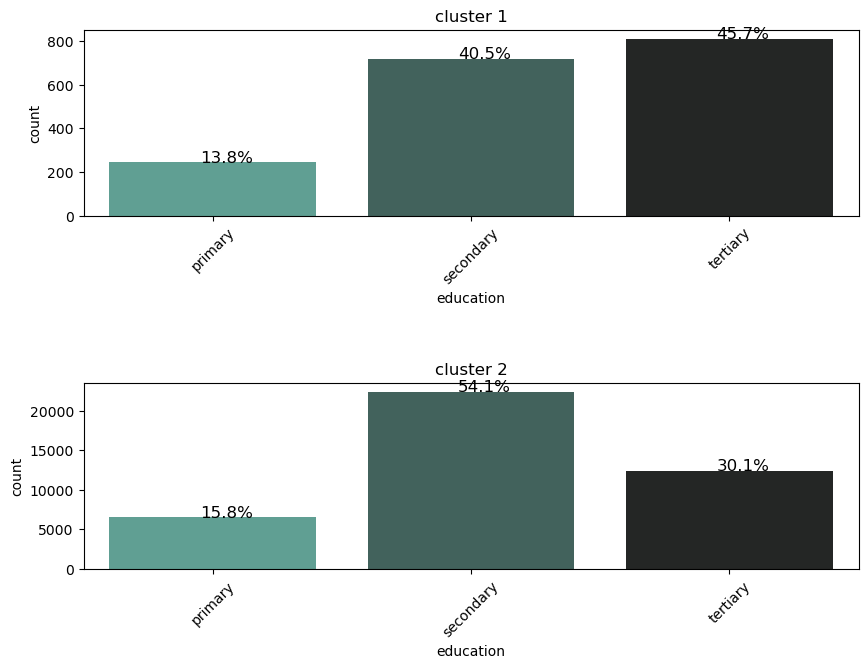

In [80]:
#Checking education breakdown for clusters
education_xlabels = ['primary','secondary','tertiary']

fig = plt.figure(figsize = (10,7))

ax1 = fig.add_subplot(2, 1, 1)
ax1 = sns.countplot('education', data=cluster2_1, palette='dark:#5A9_r')
ax1_total = cluster2_1.shape[0]
plt.title('cluster 1')
plt.xticks(rotation=45)
ax1.set_xticklabels(education_xlabels)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/ax1_total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax1.annotate(percentage, (x, y), size = 12)

ax2 = fig.add_subplot(2, 1, 2)
ax2 = sns.countplot('education', data=cluster2_2, palette = 'dark:#5A9_r')
ax2_total = cluster2_2.shape[0]
plt.title('cluster 2')
plt.xticks(rotation=45)
ax2.set_xticklabels(education_xlabels)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/ax2_total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y), size = 12)


plt.subplots_adjust(hspace=0.9)

Cluster 1 has a much higher percentage of people who have completed a tertiary education (45%) compared with that of cluster 2 (30.1%)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


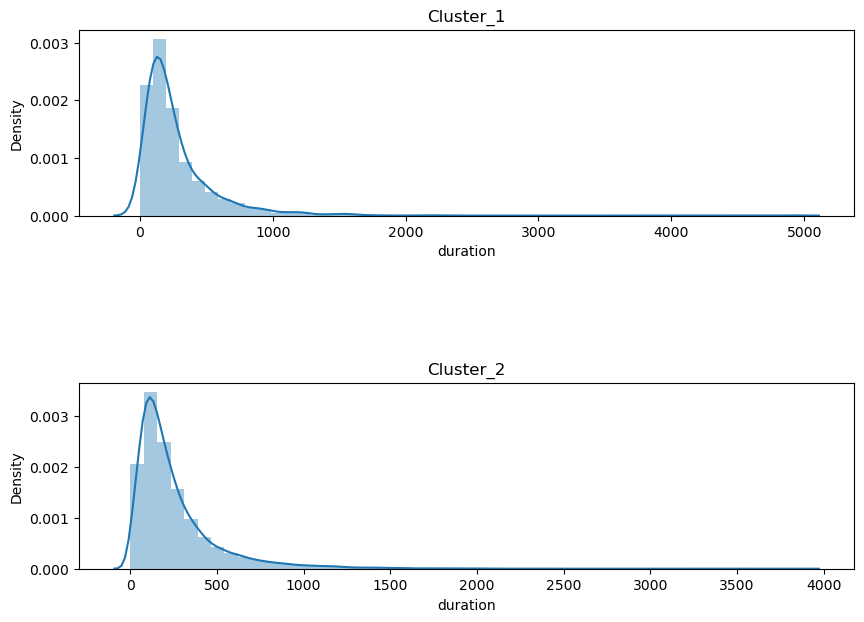

In [85]:
#checking duration distribution for clusters 

fig = plt.figure(figsize = (10,7))

ax1 = fig.add_subplot(2, 1, 1)
ax1 = sns.distplot(cluster2_1['duration']).set(title='Cluster_1')

ax2 = fig.add_subplot(2, 1, 2)
ax2 = sns.distplot(cluster2_2['duration']).set(title='Cluster_2')


plt.subplots_adjust(hspace=0.9)

Cluster 1 and cluster 2 have a similar call duration 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


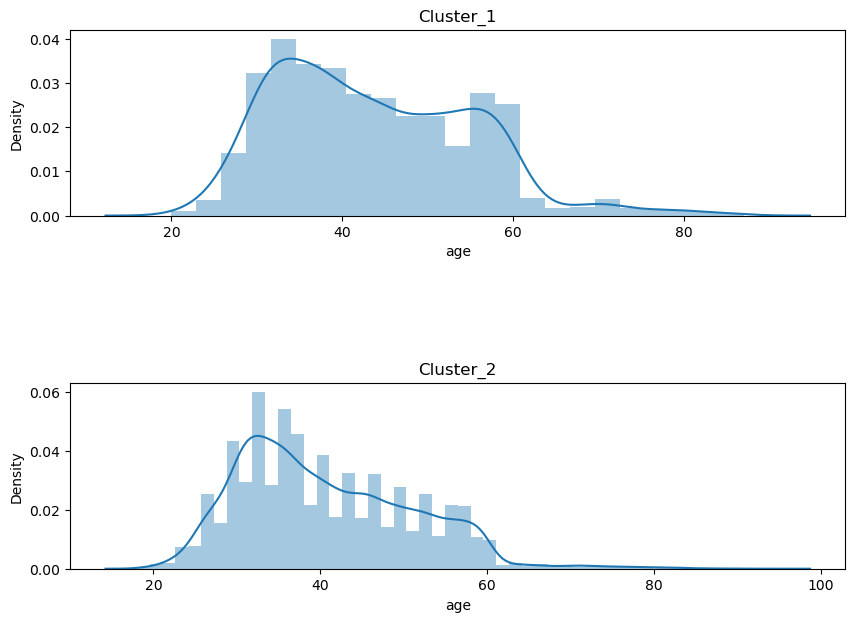

In [86]:
#checking age distribution for clusters

fig = plt.figure(figsize = (10,7))

ax1 = fig.add_subplot(2, 1, 1)
ax1 = sns.distplot(cluster2_1['age']).set(title='Cluster_1')

ax2 = fig.add_subplot(2, 1, 2)
ax2 = sns.distplot(cluster2_2['age']).set(title='Cluster_2')


plt.subplots_adjust(hspace=0.9)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


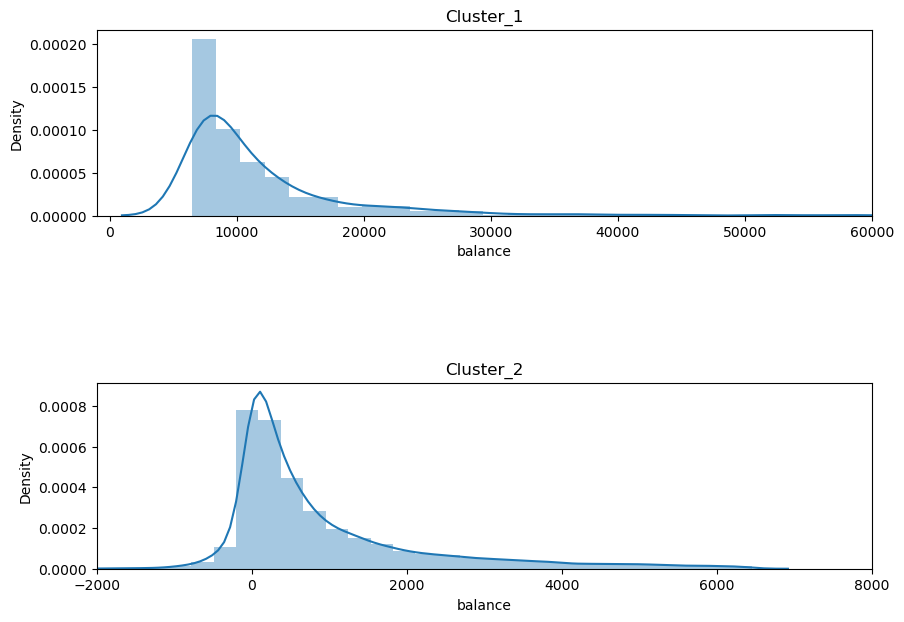

In [87]:
# checking balance distribution for clusters 

fig = plt.figure(figsize = (10,7))

ax1 = fig.add_subplot(2, 1, 1)
ax1 = sns.distplot(cluster2_1['balance']).set(title='Cluster_1')
plt.xlim(-1000, 60000)

ax2 = fig.add_subplot(2, 1, 2)
ax2 = sns.distplot(cluster2_2['balance']).set(title='Cluster_2')
plt.xlim(-2000, 8000)


plt.subplots_adjust(hspace=0.9)

Cluster 1  has a much higher bank average bank balance than cluster 2 as well as a much higher spread of balance 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


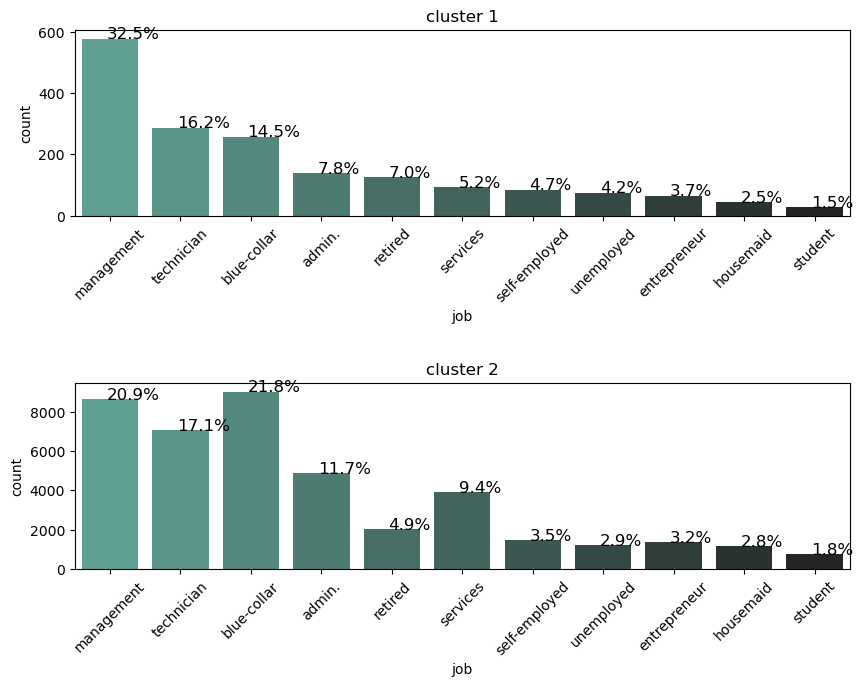

In [30]:
#checkign job distribution for clusters 

job_order = cluster2_1['job'].value_counts().index

fig = plt.figure(figsize = (10,7))

ax1 = fig.add_subplot(2, 1, 1)
ax1 = sns.countplot('job', data=cluster2_1, order= job_order, palette='dark:#5A9_r')
ax1_total = cluster2_1.shape[0]
plt.title('cluster 1')
plt.xticks(rotation=45)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/ax1_total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax1.annotate(percentage, (x, y), size = 12)

ax2 = fig.add_subplot(2, 1, 2)
ax2 = sns.countplot('job', data=cluster2_2, order= job_order, palette = 'dark:#5A9_r')
ax2_total = cluster2_2.shape[0]
plt.title('cluster 2')
plt.xticks(rotation=45)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/ax2_total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y), size = 12)


plt.subplots_adjust(hspace=0.9)

Cluster 1 has ~12% more people in management than cluster 2 
cluster two has a much higher percent of people working blue color jobs, admin and services 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


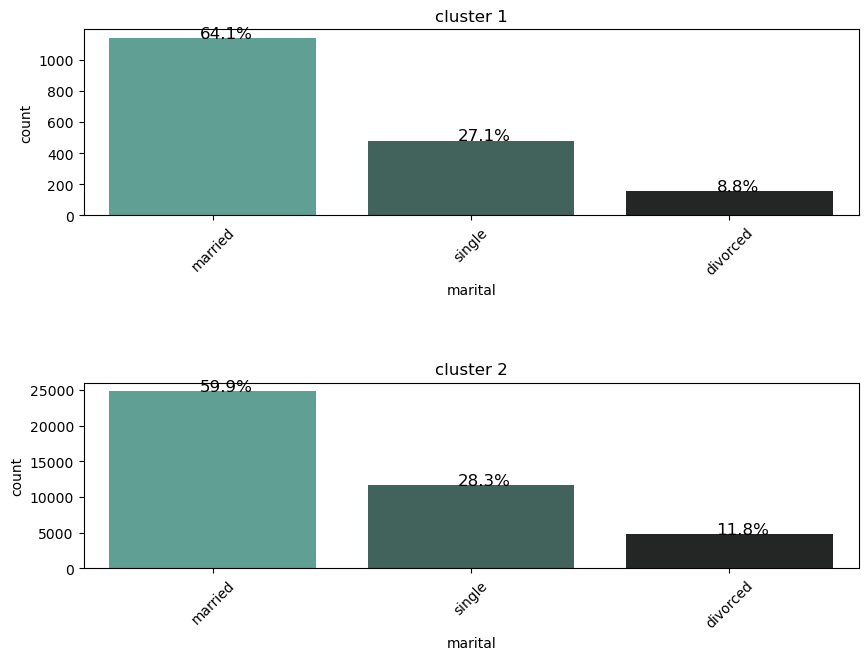

In [31]:
#checking marital status distribution for clusters 

marital_order = cluster2_1['marital'].value_counts().index

fig = plt.figure(figsize = (10,7))

ax1 = fig.add_subplot(2, 1, 1)
ax1 = sns.countplot('marital', data=cluster2_1, order= marital_order, palette='dark:#5A9_r')
ax1_total = cluster2_1.shape[0]
plt.title('cluster 1')
plt.xticks(rotation=45)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/ax1_total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax1.annotate(percentage, (x, y), size = 12)

ax2 = fig.add_subplot(2, 1, 2)
ax2 = sns.countplot('marital', data=cluster2_2, order= marital_order, palette = 'dark:#5A9_r')
ax2_total = cluster2_2.shape[0]
plt.title('cluster 2')
plt.xticks(rotation=45)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/ax2_total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y), size = 12)


plt.subplots_adjust(hspace=0.9)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


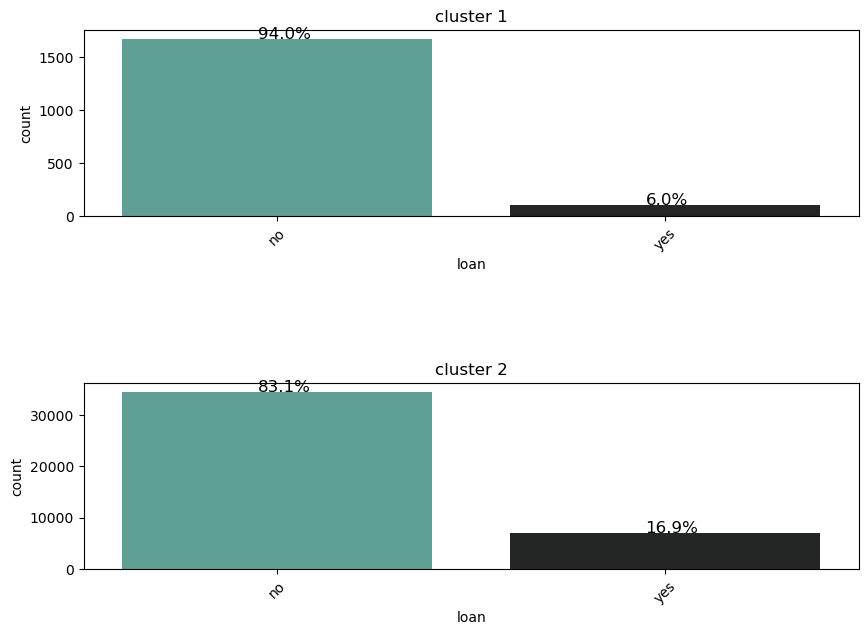

In [32]:
#checking loan distribution for clusters 

fig = plt.figure(figsize = (10,7))

ax1 = fig.add_subplot(2, 1, 1)
ax1 = sns.countplot('loan', data=cluster2_1, palette='dark:#5A9_r')
ax1_total = cluster2_1.shape[0]
plt.title('cluster 1')
plt.xticks(rotation=45)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/ax1_total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax1.annotate(percentage, (x, y), size = 12)

ax2 = fig.add_subplot(2, 1, 2)
ax2 = sns.countplot('loan', data=cluster2_2, palette = 'dark:#5A9_r')
ax2_total = cluster2_2.shape[0]
plt.title('cluster 2')
plt.xticks(rotation=45)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/ax2_total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y), size = 12)


plt.subplots_adjust(hspace=0.9)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


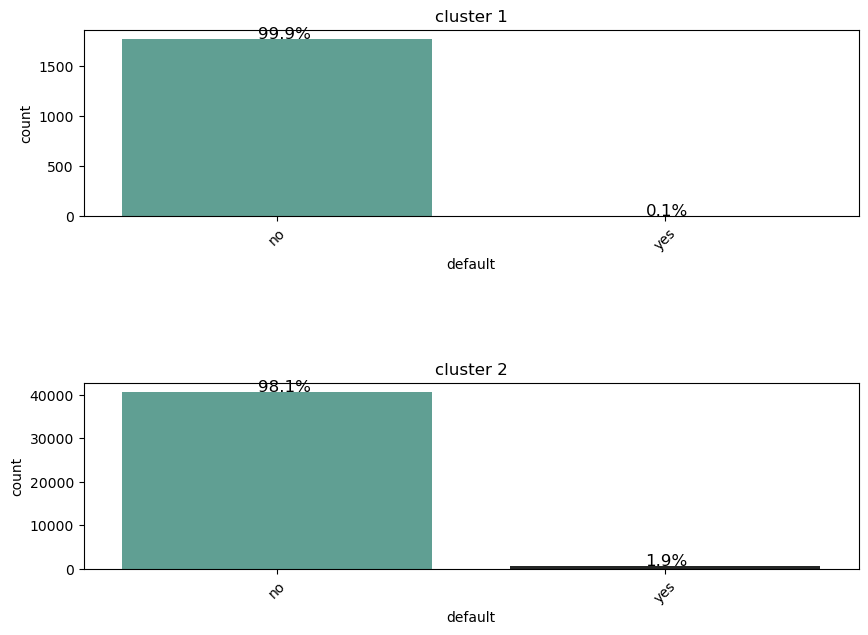

In [33]:
#checking default distribution for clusters 

fig = plt.figure(figsize = (10,7))

ax1 = fig.add_subplot(2, 1, 1)
ax1 = sns.countplot('default', data=cluster2_1, palette='dark:#5A9_r')
ax1_total = cluster2_1.shape[0]
plt.title('cluster 1')
plt.xticks(rotation=45)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/ax1_total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax1.annotate(percentage, (x, y), size = 12)

ax2 = fig.add_subplot(2, 1, 2)
ax2 = sns.countplot('default', data=cluster2_2, palette = 'dark:#5A9_r')
ax2_total = cluster2_2.shape[0]
plt.title('cluster 2')
plt.xticks(rotation=45)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/ax2_total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y), size = 12)


plt.subplots_adjust(hspace=0.9)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


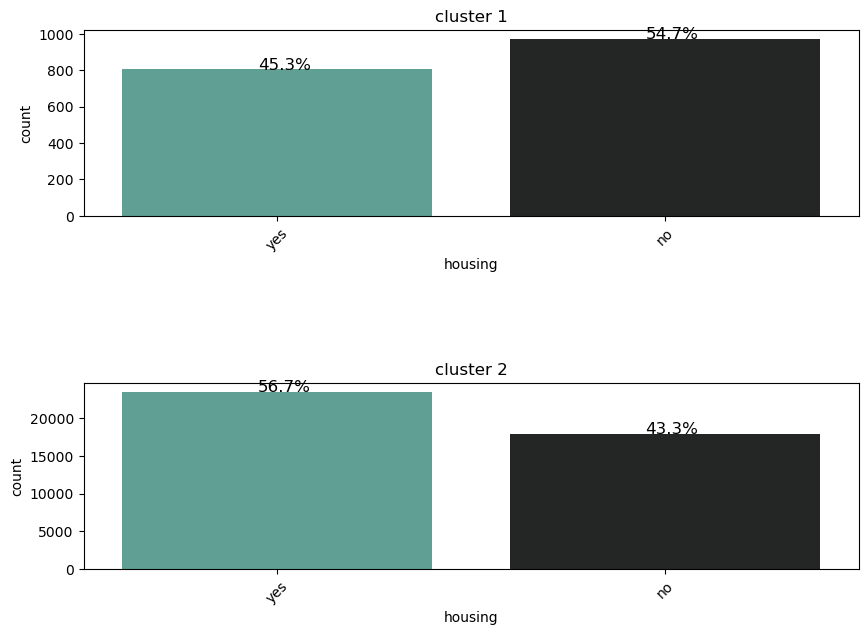

In [34]:
#checking housing loan distribution for clusters 

fig = plt.figure(figsize = (10,7))

ax1 = fig.add_subplot(2, 1, 1)
ax1 = sns.countplot('housing', data=cluster2_1, palette='dark:#5A9_r')
ax1_total = cluster2_1.shape[0]
plt.title('cluster 1')
plt.xticks(rotation=45)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/ax1_total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax1.annotate(percentage, (x, y), size = 12)

ax2 = fig.add_subplot(2, 1, 2)
ax2 = sns.countplot('housing', data=cluster2_2, palette = 'dark:#5A9_r')
ax2_total = cluster2_2.shape[0]
plt.title('cluster 2')
plt.xticks(rotation=45)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/ax2_total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y), size = 12)


plt.subplots_adjust(hspace=0.9)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


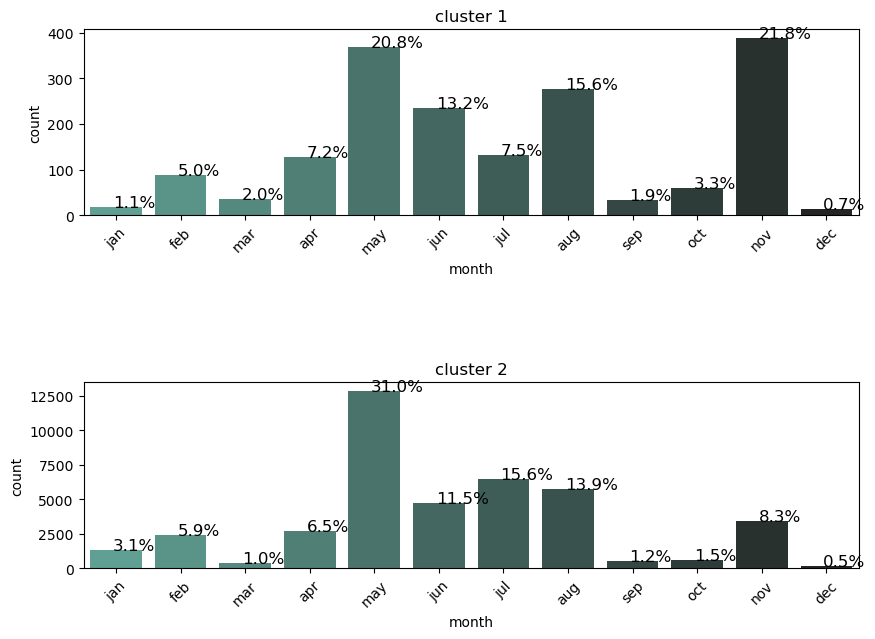

In [35]:
#checking month distribution for clusters 

month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

fig = plt.figure(figsize = (10,7))

ax1 = fig.add_subplot(2, 1, 1)
ax1 = sns.countplot('month', data=cluster2_1, palette='dark:#5A9_r', order=month_order)
ax1_total = cluster2_1.shape[0]
plt.title('cluster 1')
plt.xticks(rotation=45)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/ax1_total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax1.annotate(percentage, (x, y), size = 12)

ax2 = fig.add_subplot(2, 1, 2)
ax2 = sns.countplot('month', data=cluster2_2, palette = 'dark:#5A9_r', order=month_order)
ax2_total = cluster2_2.shape[0]
plt.title('cluster 2')
plt.xticks(rotation=45)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/ax2_total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y), size = 12)


plt.subplots_adjust(hspace=0.9)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


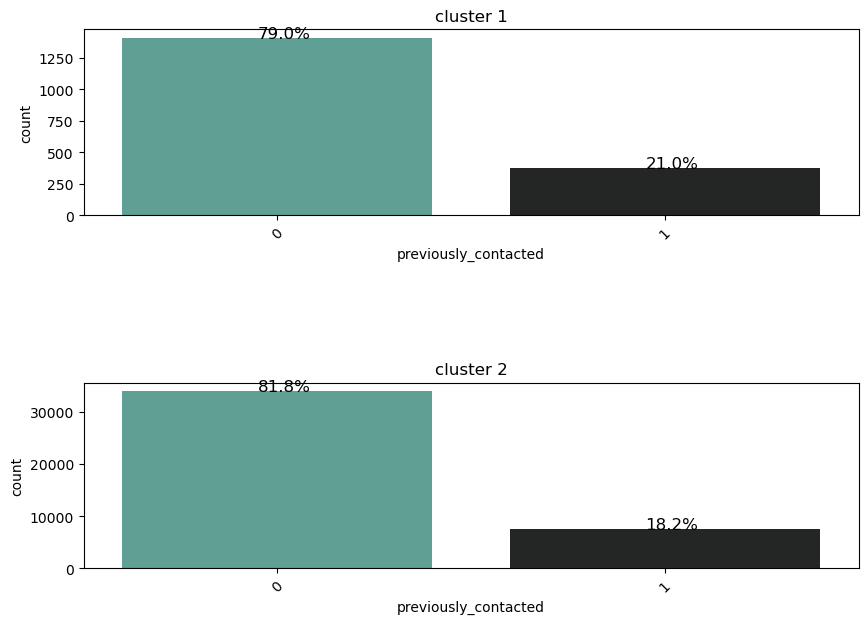

In [36]:
#checking prevously contacted distribution for clusters

fig = plt.figure(figsize = (10,7))

ax1 = fig.add_subplot(2, 1, 1)
ax1 = sns.countplot('previously_contacted', data=cluster2_1, palette='dark:#5A9_r')
ax1_total = cluster2_1.shape[0]
plt.title('cluster 1')
plt.xticks(rotation=45)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/ax1_total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax1.annotate(percentage, (x, y), size = 12)

ax2 = fig.add_subplot(2, 1, 2)
ax2 = sns.countplot('previously_contacted', data=cluster2_2, palette = 'dark:#5A9_r')
ax2_total = cluster2_2.shape[0]
plt.title('cluster 2')
plt.xticks(rotation=45)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/ax2_total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y), size = 12)


plt.subplots_adjust(hspace=0.9)

## cluster results

cluster1:

more likely to purchase a bank deposit compared to cluster 2 (15.6%)

slightly older (average age = 43)

on average better educated 

much higher average bank balance (12020)

more likely to be in management or retired than cluster 2 

less likely to have an active loan than cluster 2 (6%)

less likely to have an active housing loan than cluster 2 (45.3%)


-------------------------------------------------------------------------------------------------------------------------------

cluster2:

less likely to purchase a bank deposit compared to cluster 1(11.5%)

slightly younger (average age = 40)

less educated on average

much lower average bank balance (896)

more likely to be working in blue-collar, service or admin jobs than cluseter 1 

more likely to have an active loan than cluster 1 (16.9%)

more likely to have an active housing loan than cluster 1 (56.7%)

# Modeling

### preparing data for modeling

In [37]:
#creating encoded dataset copy
banking_encoded = banking_clean

In [38]:
banking_clean

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,previous,y,previously_contacted,clusters_2_cent
0,58,management,married,2,no,2143,yes,no,5,may,261,1,0,0,0,1
1,44,technician,single,1,no,29,yes,no,5,may,151,1,0,0,0,1
2,33,entrepreneur,married,1,no,2,yes,yes,5,may,76,1,0,0,0,1
5,35,management,married,2,no,231,yes,no,5,may,139,1,0,0,0,1
6,28,management,single,2,no,447,yes,yes,5,may,217,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,2,no,825,no,no,17,nov,977,3,0,1,0,1
45207,71,retired,divorced,0,no,1729,no,no,17,nov,456,2,0,1,0,1
45208,72,retired,married,1,no,5715,no,no,17,nov,1127,5,3,1,1,1
45209,57,blue-collar,married,1,no,668,no,no,17,nov,508,4,0,0,0,1


In [39]:
#dropping columns
banking_encoded.drop(['day','previous'],axis=1,inplace=True)
banking_encoded.drop(['clusters_2_cent'],axis=1,inplace=True)

In [40]:
banking_encoded.head()

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,y,previously_contacted
0,58,management,married,2,no,2143,yes,no,may,261,1,0,0
1,44,technician,single,1,no,29,yes,no,may,151,1,0,0
2,33,entrepreneur,married,1,no,2,yes,yes,may,76,1,0,0
5,35,management,married,2,no,231,yes,no,may,139,1,0,0
6,28,management,single,2,no,447,yes,yes,may,217,1,0,0


In [41]:
#encoding dummy variabels for all categorical variabels

#default
banking_encoded['default'].replace({'no':'0','yes':'1'}, inplace=True)
banking_encoded['default'] = pd.to_numeric(banking_encoded['default'])

#housing
banking_encoded['housing'].replace({'no':'0','yes':'1'}, inplace=True)
banking_encoded['housing'] = pd.to_numeric(banking_encoded['housing'])

#loan
banking_encoded['loan'].replace({'no':'0','yes':'1'}, inplace=True)
banking_encoded['loan'] = pd.to_numeric(banking_encoded['loan'])

#rest of the dataset
banking_encoded = pd.get_dummies(banking_encoded)

In [42]:
#defining variables 

X_en = banking_encoded.drop('y', axis=1)
y_en = banking_encoded['y']

In [43]:
#creating new test train split with encoded variables 
#creating a test train split
X_en_train, X_en_test, y_en_train, y_en_test = train_test_split(X_en, y_en, test_size = 0.2, random_state = 42)

In [44]:
#creating smote variables for imbalanced target variable
smote=SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_en_train, y_en_train)

In [45]:
#scaling data
scaler=StandardScaler()
scaled_X_train = scaler.fit_transform(X_train_resampled)
scaled_X_test = scaler.transform(X_en_test)

### Random Forest Classifier 

In [46]:
%%time
#creating model
rfc = RandomForestClassifier(n_estimators=1000, random_state=42)
model_rfc = rfc.fit(scaled_X_train, y_train_resampled)

Wall time: 38.9 s


In [47]:
#using model to predict y test values 
y_pred_rfc = model_rfc.predict(scaled_X_test)

In [48]:
#printing classification report 
print(metrics.classification_report(y_en_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7658
           1       0.58      0.40      0.48       981

    accuracy                           0.90      8639
   macro avg       0.75      0.68      0.71      8639
weighted avg       0.89      0.90      0.89      8639



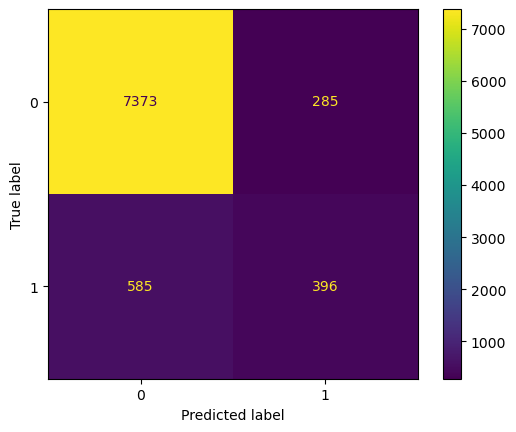

In [49]:
#creating confusion matrix
rf_conf = metrics.confusion_matrix(y_test, y_pred_rfc)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = rf_conf)

cm_display.plot()
plt.grid(False)
plt.show()

## Stacking
##### LogisticRegression, Svc, DecisionTree

In [50]:
#setting up the models
np.random.seed(42)
model_1 = LogisticRegression(max_iter=1000)
model_2 = SVC()
model_3 = DecisionTreeClassifier()
meta_model = LogisticRegression()

In [51]:
#creating stacking model
stacking_classifier = StackingClassifier(
    estimators=[('lr',model_1), ('svc',model_2), ('dtc',model_3)], 
    final_estimator=meta_model
)

In [52]:
%%time
#trainig model
stacking_classifier.fit(scaled_X_train, y_train_resampled)

Wall time: 2min 24s


StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                               ('svc', SVC()),
                               ('dtc', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())

In [53]:
#prediction target variable 
y_pred_stacking = stacking_classifier.predict(scaled_X_test)

In [54]:
#printing classification report
print(metrics.classification_report(y_en_test, y_pred_stacking))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7658
           1       0.59      0.27      0.37       981

    accuracy                           0.90      8639
   macro avg       0.75      0.62      0.66      8639
weighted avg       0.88      0.90      0.88      8639



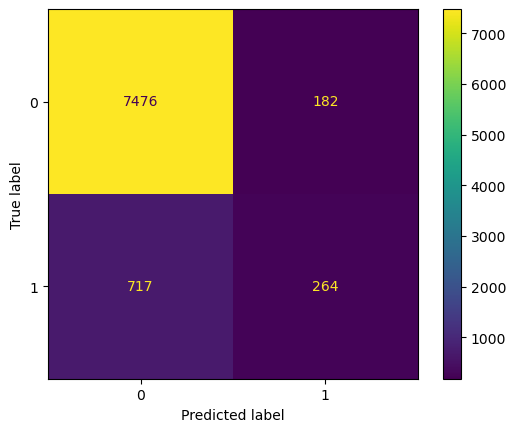

In [55]:
#creating confusion matrix
stacking_conf = metrics.confusion_matrix(y_test, y_pred_stacking)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = stacking_conf)

cm_display.plot()
plt.grid(False)
plt.show()

#### Knn, RandomForest, Gnb

In [56]:
#defining base estimators and meta estimator 

np.random.seed(42)
clf1 = KNeighborsClassifier(n_neighbors = 1)
clf2 = RandomForestClassifier(n_estimators = 10, random_state = 1)
clf3 = GaussianNB()
lr = LogisticRegression(multi_class = 'auto', solver = 'lbfgs')

In [57]:

#creating stacking model

stacking_classifier_1 = StackingClassifier(estimators = [('knn',clf1), ('rfc', clf2), ('gnb',clf3)],
    final_estimator = lr)

In [58]:
%%time
#fitting model 

stacking_classifier_1.fit(scaled_X_train, y_train_resampled)

Wall time: 29.5 s


StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=1)),
                               ('rfc',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=1)),
                               ('gnb', GaussianNB())],
                   final_estimator=LogisticRegression())

In [59]:
#prediciting target variable using stacking classifier 
y_pred_stacking_1 = stacking_classifier_1.predict(scaled_X_test)

In [60]:
#printing classification report
print(metrics.classification_report(y_en_test, y_pred_stacking_1))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7658
           1       0.50      0.50      0.50       981

    accuracy                           0.89      8639
   macro avg       0.72      0.72      0.72      8639
weighted avg       0.89      0.89      0.89      8639



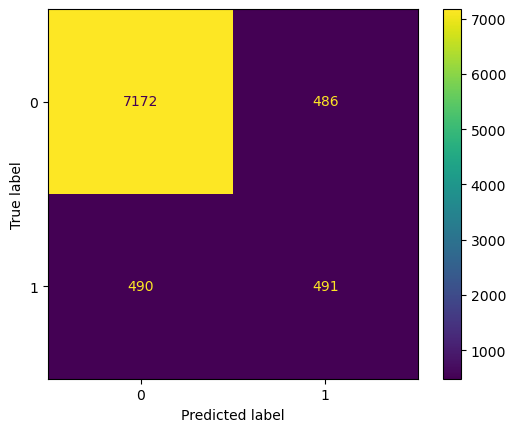

In [61]:
#creating confusion matrix

stacking_1_conf = metrics.confusion_matrix(y_test, y_pred_stacking_1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = stacking_1_conf)

cm_display.plot()
plt.grid(False)
plt.show()

## Bagging

In [62]:
%%time
# Create the decision tree model
base_model = DecisionTreeClassifier()

# Create the bagging model
bagging_model = BaggingClassifier(base_estimator=base_model, n_estimators=10)

# Fit the bagging model to the training data
bagging_model.fit(scaled_X_train, y_train_resampled)

# Make predictions on the test data
y_pred_bag = bagging_model.predict(scaled_X_test)

Wall time: 1.38 s


In [63]:
#printing classification report
print(metrics.classification_report(y_en_test, y_pred_bag))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7658
           1       0.53      0.41      0.46       981

    accuracy                           0.89      8639
   macro avg       0.73      0.68      0.70      8639
weighted avg       0.88      0.89      0.89      8639



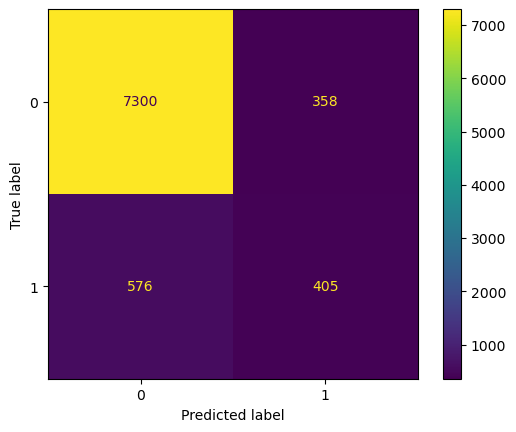

In [64]:
#creating confusion matrix

bagging_conf = metrics.confusion_matrix(y_test, y_pred_bag)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = bagging_conf)

cm_display.plot()
plt.grid(False)
plt.show()

## ADAboosting

In [65]:
#defining base classifier for ada boost
dtclf_base = DecisionTreeClassifier(max_depth=1)

In [66]:
#creating adaboost model
adaboost = AdaBoostClassifier(base_estimator=dtclf_base, n_estimators=50)

In [67]:
%%time
#fitting model
adaboost.fit(scaled_X_train, y_train_resampled)

Wall time: 1.58 s


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

In [68]:
#predicting target variable using Adaboost model
y_pred_ada = adaboost.predict(scaled_X_test)

In [69]:
#printing classification report
print(metrics.classification_report(y_en_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7658
           1       0.52      0.45      0.49       981

    accuracy                           0.89      8639
   macro avg       0.73      0.70      0.71      8639
weighted avg       0.88      0.89      0.89      8639



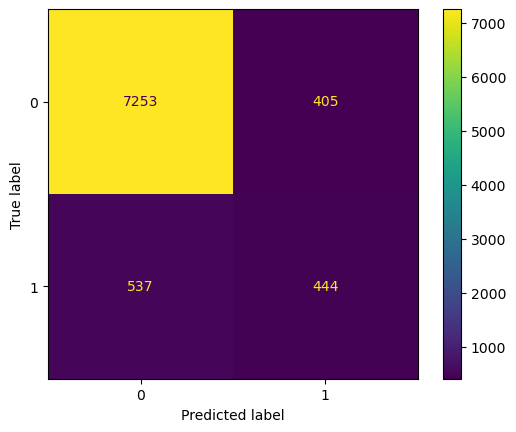

In [70]:
#creating confusion matrix

ada_conf = metrics.confusion_matrix(y_test, y_pred_ada)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = ada_conf)

cm_display.plot()
plt.grid(False)
plt.show()

Overall the best model is stacking with knn, random forest and gnb

#### feature importance for random forest (One of the models in the stacking classifier)

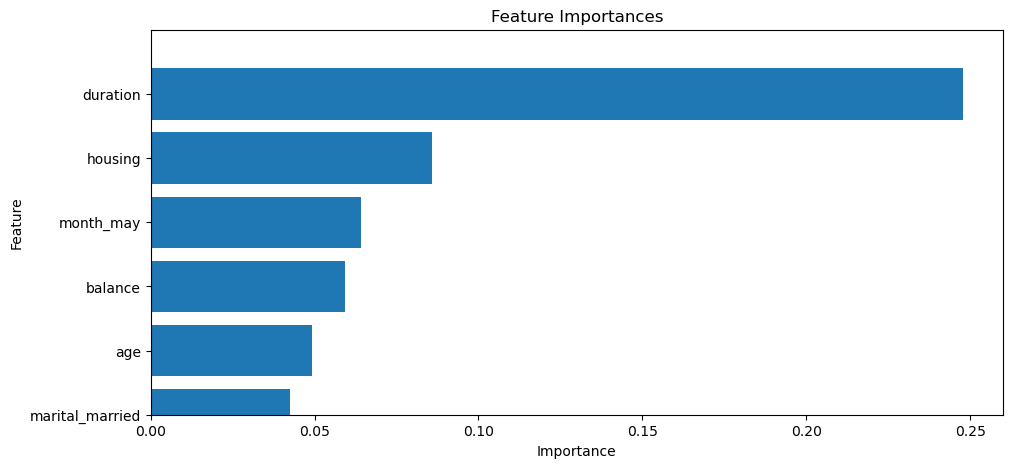

In [71]:
#graph showing top 6 feature importances for report 
plt.figure(figsize=(11,5))
importances = rfc.feature_importances_

# Get the feature names
feature_names = X_train_resampled.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)

# Rearrange the feature names so they match the sorted feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Create a barplot of the feature importances
plt.barh(sorted_feature_names, importances[indices])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.ylim(29,35)
plt.title('Feature Importances')
plt.show()

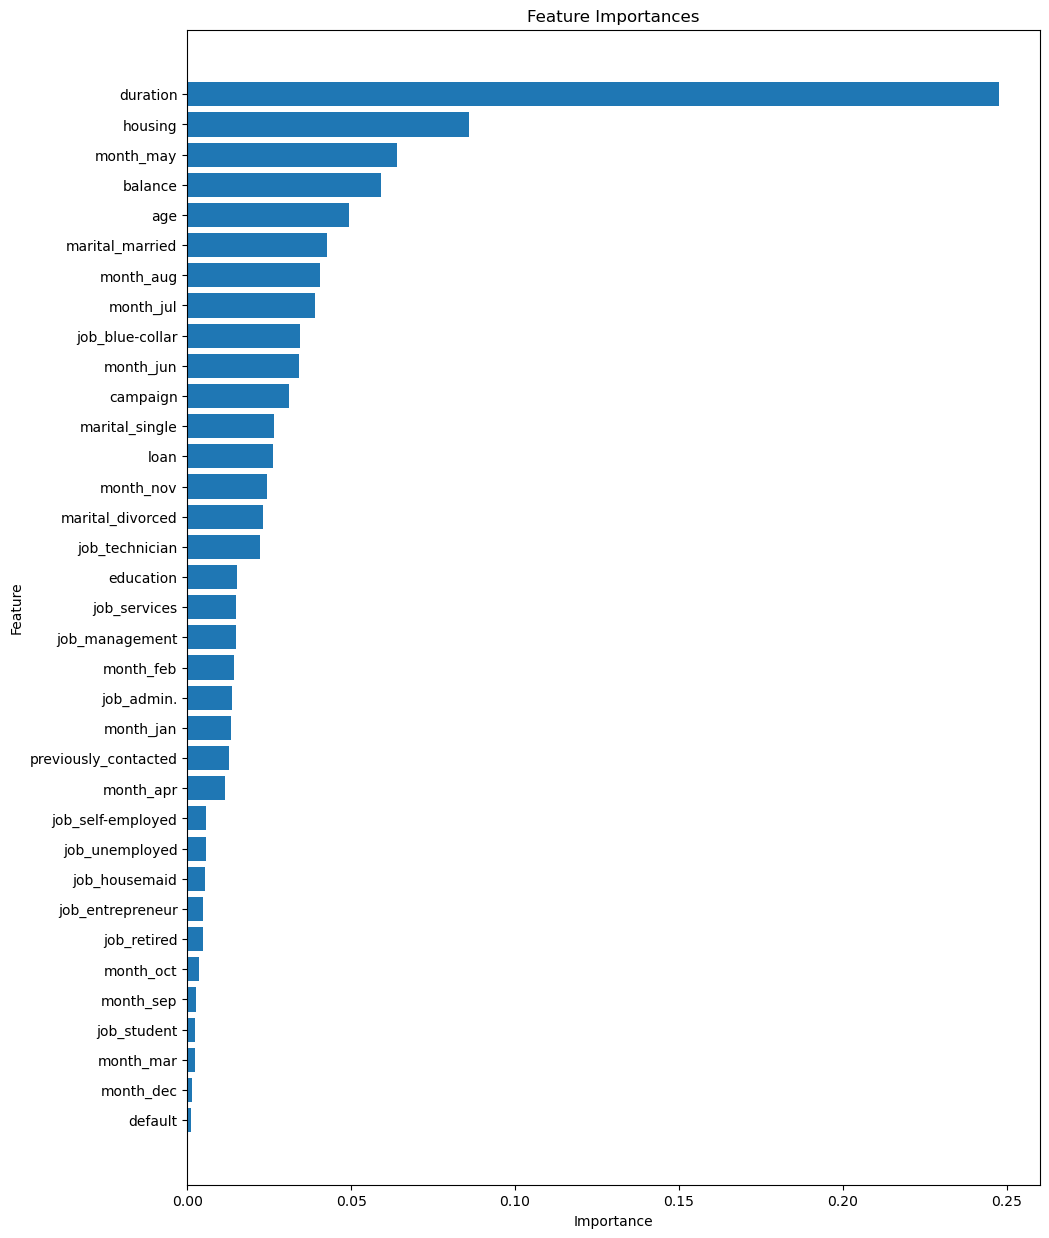

In [72]:
#graph showing full list of feature importances
plt.figure(figsize=(11,15))
importances = rfc.feature_importances_

# Get the feature names
feature_names = X_train_resampled.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)

# Rearrange the feature names so they match the sorted feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Create a barplot of the feature importances
plt.barh(sorted_feature_names, importances[indices])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [73]:
feature_importance_df = pd.DataFrame({'feature_names': feature_names, 'importance': importances})

In [74]:
feature_importance_df.sort_values('importance', ascending=False)

,feature_names,importance
6,duration,0.247679
4,housing,0.085896
31,month_may,0.064067
3,balance,0.059223
0,age,0.049291
21,marital_married,0.042555
24,month_aug,0.040577
28,month_jul,0.038875
10,job_blue-collar,0.034403
29,month_jun,0.034017
